In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

15180 audiofiles: 7950 male and 7230 female

162 speakers

344 sessions

set a, CNA - speech under intoxication

set NA - speech under sober conditions

In [3]:
df = pd.read_csv('../data/dataframe.csv')
df.head()

,session,utterance,utt,spn,o_utt,item,o_item,alc,sex,age,...,aak,bak,ges,ces,wea,irreg,anncom,specom,type,content
0,ses4038,5444038020_h_00,5444038020,544,5.443046e+09,20,20.0,na,M,27,...,0.0,0.0,f5,r1,SUN,1|0|0|0|0|1|0|0|0,NaN,NaN,R,T
1,ses4038,5444038033_h_00,5444038033,544,NaN,33,NaN,na,M,27,...,0.0,0.0,f5,r1,SUN,0|0|0|0|0|0|0|0|0,NaN,NaN,R,A
2,ses4038,5444038035_h_00,5444038035,544,NaN,35,NaN,na,M,27,...,0.0,0.0,f5,r1,SUN,9999|0|0|0|0|0|0|0|0,NaN,NaN,L,N
3,ses4038,5444038060_h_00,5444038060,544,5.443046e+09,60,30.0,na,M,27,...,0.0,0.0,f5,r1,SUN,9999|0|0|0|0|0|0|0|0,NaN,NaN,L,S
4,ses4038,5444038026_h_00,5444038026,544,5.443046e+09,26,6.0,na,M,27,...,0.0,0.0,f5,r1,SUN,9999|0|0|0|0|0|0|0|0,NaN,NaN,L,N


In [4]:
f"all columns in the dataframe: {', '.join(list(df.columns))}"

'all columns in the dataframe: session, utterance, utt, spn, o_utt, item, o_item, alc, sex, age, acc, drh, aak, bak, ges, ces, wea, irreg, anncom, specom, type, content'

## 📍 acc: state pf elementary school

In [5]:
df['acc'].value_counts()

acc
BY    11370
BW     1050
HE      570
NW      540
NI      450
BE      270
XX      180
RP      180
SN      180
MV       90
NS       90
SL       90
SH       90
-        30
Name: count, dtype: int64

<AxesSubplot: xlabel='acc'>

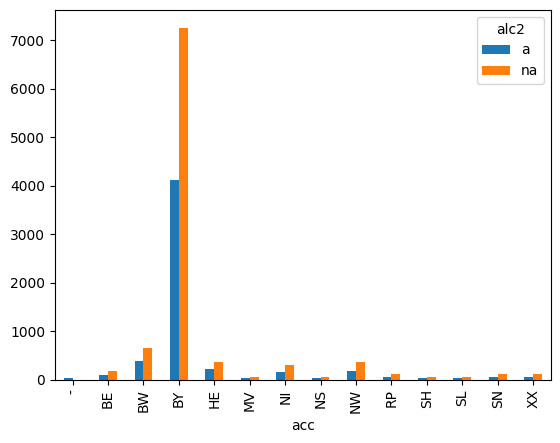

In [22]:
pd.crosstab(df['acc'],df['alc2']).plot.bar()

As far as ~75% recordings contain speech of Bavarian school graduates this meta-info night not come in handy, but we should be aware of it and maybe later check how the quality of predictions depends on the possible accent of the speaker

## ❌ anncom: comment of annotators

In [6]:
print(f"Unique comments of annotators: {df['anncom'].unique()}")
print(f"Number of not-Nan sessions: {df[df['anncom']=='Micky_Maus']['session'].unique()}")

Unique comments of annotators: [nan 'Micky_Maus']
Number of not-Nan sessions: ['ses1009' 'ses1006' 'ses1008']


has only 2 unique values: *Nan* and *Micky-Maus* -> makes no sense for us rn

## 📍 specom: comment about the speaker 
Let's print out numbers of not-Nan-labelled sessions and their ids:

In [7]:
for com in df['specom'].unique():
    if isinstance(com, str):
        un_com = df[df['specom']==com]['session'].unique()
        print(f"{com}: {len(un_com)}\n {un_com}\n")
    else:
        print(f"{com}: {df['specom'].isna().sum()}\n")

nan: 14610

no_BAK_measurement: 6
 ['ses2028' 'ses1024' 'ses1032' 'ses1025' 'ses2012' 'ses2017']

strange_velar_plosive: 2
 ['ses4007' 'ses3016']

engine_failure_NA: 3
 ['ses5008' 'ses2046' 'ses1055']

no_native_speaker: 2
 ['ses4013' 'ses3018']



In 90% cases has no labelling, but there are 2 speakers marked as "no_native_speaker" and 2 others with a "strange_velar_plosive" remark, we might look at the model's predictions for these speakers more carefully in order to probably find something worth attention

## 📍 irreg: 9 types of labeled irregularities

In [8]:
df[[f'i{j}' for j in range (1,10)]] = df['irreg'].str.split('|', expand=True)
#i1 - sum of 'irregularities' in this recording (see section 
# 'annotation' for a detailed definition of this count) -> 
# when i1 >0 -> certain irregularities occur in speech
df['i1'].value_counts()

i1
9999    5404
0       5260
1       1823
2        815
3        474
4        337
5        273
6        165
7        150
8        123
9         81
10        69
11        52
12        40
13        32
14        26
16        13
15        12
18        10
17         7
20         4
23         3
19         2
29         1
27         1
24         1
22         1
21         1
Name: count, dtype: int64

Irregularities might come in handy as they might affect model's predictions: e.g. repetitions or hesitations may influence on "intoxicated speech" labelling. BUT in ~70% there is no meta-info on the recordings

## ❌ wea: weather (sun/rain)

In [9]:
df['wea'].value_counts()

wea
SUN     14130
RAIN     1050
Name: count, dtype: int64

mostly sunny -> makes no sense for us rn

from lingustic perspective, we might assume that it may really make no influence on speech, whether it's intoxicated or not

## ✅ age, sex, drh, aak, bak, content, type

In [10]:
print("Sex distribution by audio") 
pd.DataFrame(df['sex'].value_counts())

Sex distribution by audio


,count
sex,
M,7950
F,7230


Data seems balanced by gender

<AxesSubplot: ylabel='age'>

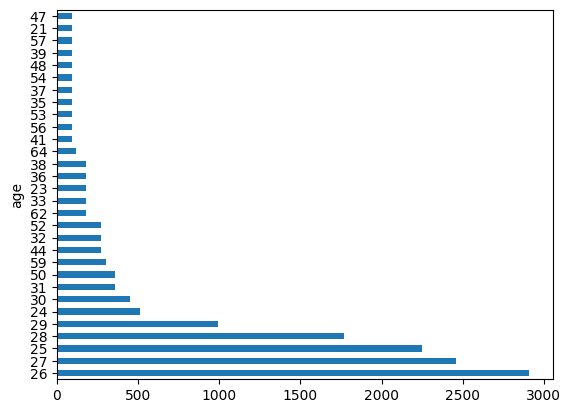

In [11]:
df.age.value_counts().plot(kind='barh')

Mostly young people aged from 26 to 29 took part in audio recording.

In [12]:
bins = [17, 26, 35, 50, np.inf]
names = ['<26', '26-35', '36-50', '50+']

df['AgeRange'] = pd.cut(df['age'], bins, labels=names)

<AxesSubplot: xlabel='AgeRange'>

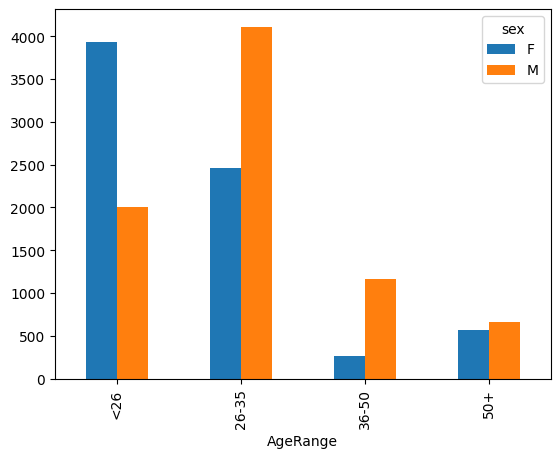

In [13]:
pd.crosstab(df['AgeRange'],df['sex']).plot.bar()

<AxesSubplot: xlabel='AgeRange'>

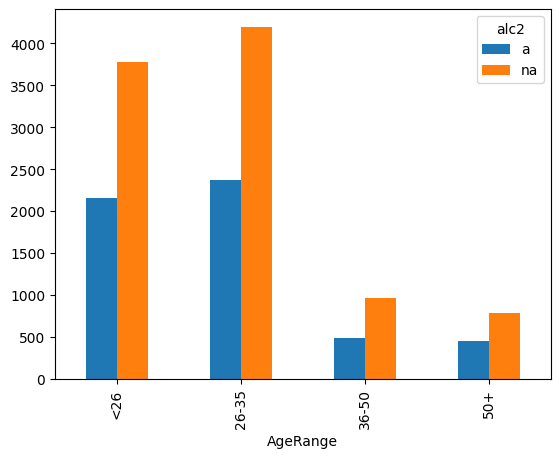

In [18]:
pd.crosstab(df['AgeRange'],df['alc2']).plot.bar()

In [12]:
df[["sex", "age"]].groupby("sex").mean()

,age
sex,
F,29.091286
M,32.652830


Data seems to be quite balanced in distribution by gender and sex. Let's take a look at the possible correlations between sex, age and soberity.

<AxesSubplot: xlabel='sex'>

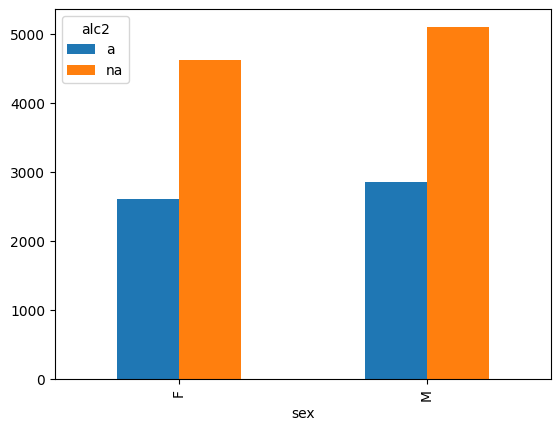

In [17]:
d = {'cna': 'a', 'a': 'a', 'na':'na'}
df['alc2'] = df['alc'].map(d) # map 'cna' and 'a' labels into one 'a' (it's the same)
pd.crosstab(df['sex'],df['alc2']).plot.bar()

In [14]:
print(f" male speech under intoxication {df[(df['sex']=='M') & (df['alc2']=='a')].shape[0]}\n",
      f"male speech under sober conditions {df[(df['sex']=='M') & (df['alc2']=='na')].shape[0]}\n",
      f"female speech under intoxication {df[(df['sex']=='F') & (df['alc2']=='a')].shape[0]}\n",
      f"female speech under sober conditions {df[(df['sex']=='F') & (df['alc2']=='na')].shape[0]}")

 male speech under intoxication 2850
 male speech under sober conditions 5100
 female speech under intoxication 2610
 female speech under sober conditions 4620


Possible further problems: model might constantly (worst case) or mostly predict soberity.

In [15]:
df['content'].value_counts()

T    2530
A    2530
N    2530
C    2530
R    2186
P    1518
Q    1012
S     344
Name: content, dtype: int64

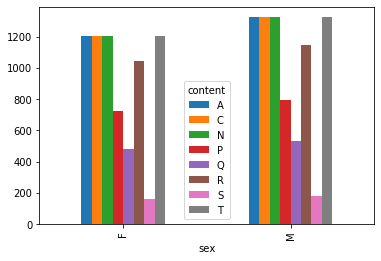

In [16]:
pd.crosstab(df['sex'],df['content']).plot.bar()

<AxesSubplot: xlabel='alc2'>

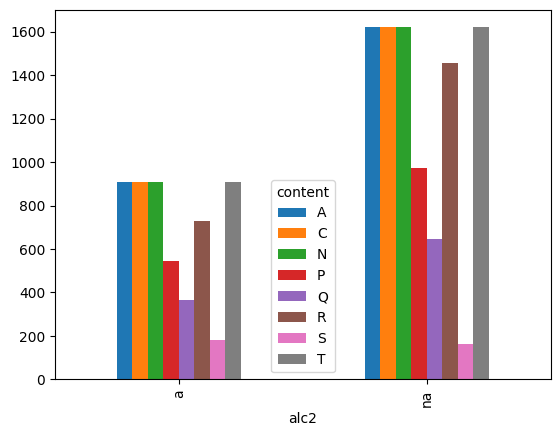

In [20]:
pd.crosstab(df['alc2'],df['content']).plot.bar()

<AxesSubplot: xlabel='alc2'>

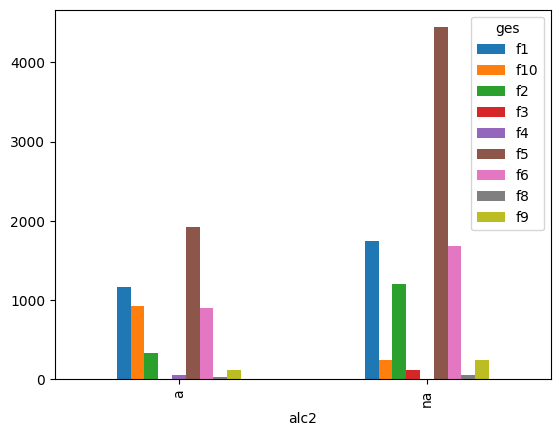

In [23]:
pd.crosstab(df['alc2'],df['ges']).plot.bar()

In [17]:
print(f"mean aak in intoxicated speecj: {df[df['alc'] == 'a']['aak'].mean()}")
print(f"mean bak in intoxicated speecj: {df[df['alc'] == 'a']['bak'].mean()}")

mean aak in intoxicated speecj: 0.0008868518518518375
mean bak in intoxicated speecj: 0.000889814814814818


In [18]:
df.groupby(["sex", "content"])["aak"].mean()

sex  content
F    A          0.000276
     C          0.000276
     N          0.000276
     P          0.000276
     Q          0.000276
     R          0.000256
     S          0.000405
     T          0.000276
M    A          0.000291
     C          0.000291
     N          0.000291
     P          0.000291
     Q          0.000291
     R          0.000270
     S          0.000429
     T          0.000291
Name: aak, dtype: float64

In [19]:
df[["sex", "content"]].value_counts()

sex  content
M    A          1325
     C          1325
     N          1325
     T          1325
F    A          1205
     C          1205
     N          1205
     T          1205
M    R          1145
F    R          1041
M    P           795
F    P           723
M    Q           530
F    Q           482
M    S           180
F    S           164
dtype: int64

In [20]:
pd.DataFrame(df[["sex", "type"]].value_counts())

,,0
sex,type,
M,R,3615
F,R,3287
M,L,1685
F,L,1533
M,E,1325
F,E,1205
M,M,710
F,M,646
M,D,615


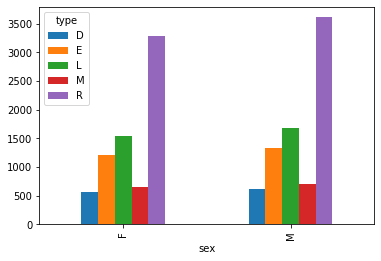

In [21]:
pd.crosstab(df['sex'],df['type']).plot.bar()

In [22]:
len(df['spn'].unique())

162

In [23]:
df['alc'].unique()

array(['na', 'cna', 'a'], dtype=object)

In [24]:
df.shape

(15180, 32)

In [25]:
', '.join(list(df.columns))

'session, utterance, utt, spn, o_utt, item, o_item, alc, sex, age, acc, drh, aak, bak, ges, ces, wea, irreg, anncom, specom, type, content, i1, i2, i3, i4, i5, i6, i7, i8, i9, alc2'

In [26]:
df.describe()

,utt,spn,o_utt,item,o_item,age,aak,bak
count,1.518000e+04,15180.000000,9.976000e+03,15180.000000,9976.000000,15180.000000,15180.000000,15180.000000
mean,2.933084e+09,293.029644,2.939549e+09,25.104743,24.197474,30.956522,0.000284,0.000285
std,2.484940e+09,248.395281,2.485855e+09,16.456783,15.308179,9.547063,0.000449,0.000447
min,6.100600e+07,6.000000,6.100600e+07,1.000000,1.000000,21.000000,0.000000,0.000000
25%,5.410550e+08,54.000000,5.420460e+08,12.000000,12.000000,26.000000,0.000000,0.000000
50%,1.006595e+09,100.500000,1.006595e+09,23.000000,22.000000,27.000000,0.000000,0.000000
75%,5.483044e+09,548.000000,5.486288e+09,37.000000,32.000000,30.000000,0.000630,0.000630
max,5.964080e+09,596.000000,5.964080e+09,60.000000,60.000000,64.000000,0.001820,0.001750


In [27]:
len(df.groupby('utt'))

15180

In [28]:
len(df.groupby('session'))

344